In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv ("../data/raw/Labeled Data Set.csv")

In [3]:
df.head() 

,Latitude,Longitude,Elevation,Slope,Aspect,Curvature,SPI,TWI,TRI,NDVI,LULC,Annual_Rainfall,Drainage_Density,Soil_Texture,Landslide
0,22.645184,92.197626,46,4.077521,310.236359,0.224299,NaN,NaN,1.987616,0.075623,7.0,57.196407,0.0,NaN,1
1,22.646482,92.197168,41,2.732584,127.874985,0.000000,-3.04222,-3.04222,1.286204,0.086853,7.0,57.211571,0.0,NaN,1
2,22.647297,92.195212,53,2.397054,90.000000,0.672897,NaN,NaN,1.490712,0.067504,7.0,57.211571,0.0,NaN,1
3,22.646742,92.193913,43,5.756790,265.236359,0.448598,NaN,NaN,2.748737,0.055501,7.0,57.227306,0.0,NaN,1
4,22.660147,92.155306,60,5.452793,254.744888,0.336448,NaN,NaN,4.876246,0.169679,7.0,57.192352,0.0,7.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          498 non-null    float64
 1   Longitude         498 non-null    float64
 2   Elevation         498 non-null    int64  
 3   Slope             494 non-null    float64
 4   Aspect            494 non-null    float64
 5   Curvature         498 non-null    float64
 6   SPI               298 non-null    float64
 7   TWI               298 non-null    float64
 8   TRI               498 non-null    float64
 9   NDVI              498 non-null    float64
 10  LULC              497 non-null    float64
 11  Annual_Rainfall   496 non-null    float64
 12  Drainage_Density  496 non-null    float64
 13  Soil_Texture      448 non-null    float64
 14  Landslide         498 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 58.5 KB


In [5]:
df.shape

(498, 15)

# Missing Values Treatment 


In [6]:
from sklearn.impute import KNNImputer, SimpleImputer

# Create a copy of your dataframe
df_imputed = df.copy()

# 1. Hydrological features with spatial correlation (SPI & TWI)
# Use KNN imputer with geographical coordinates as reference
geo_imputer = KNNImputer(n_neighbors=5)
spatial_features = ['Latitude', 'Longitude', 'SPI', 'TWI']
df_imputed[spatial_features] = geo_imputer.fit_transform(df_imputed[spatial_features])

# 2. Categorical/ordinal features (Soil Texture & LULC)
# Use mode imputation for categorical variables
mode_imputer = SimpleImputer(strategy='most_frequent')
df_imputed[['Soil_Texture', 'LULC']] = mode_imputer.fit_transform(
    df_imputed[['Soil_Texture', 'LULC']]
)

# 3. Continuous numerical features with normal distribution
# Use median imputation for remaining features
median_imputer = SimpleImputer(strategy='median')
median_features = ['Slope', 'Aspect', 'Annual_Rainfall', 'Drainage_Density']
df_imputed[median_features] = median_imputer.fit_transform(
    df_imputed[median_features]
)

# Verify no remaining missing values
print(df_imputed.isnull().sum())


Latitude            0
Longitude           0
Elevation           0
Slope               0
Aspect              0
Curvature           0
SPI                 0
TWI                 0
TRI                 0
NDVI                0
LULC                0
Annual_Rainfall     0
Drainage_Density    0
Soil_Texture        0
Landslide           0
dtype: int64


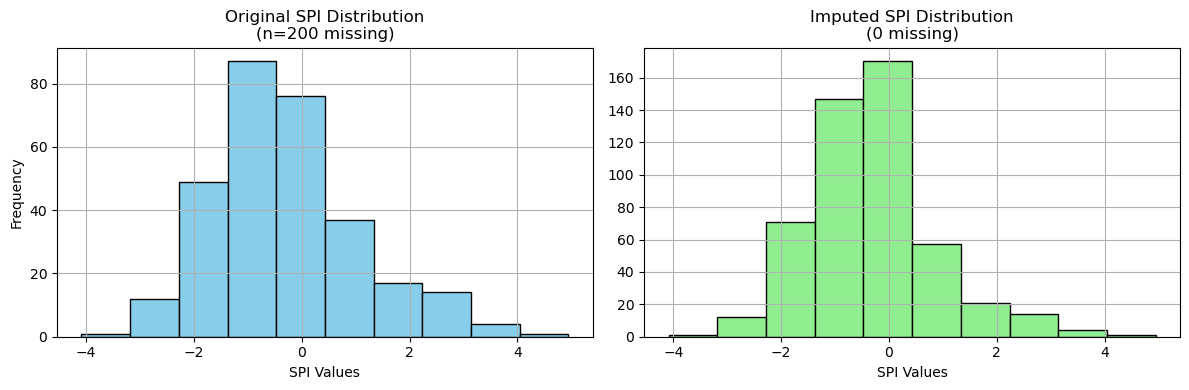

In [7]:
# Before-after comparison (ensure df and df_imputed exist)
missing_comparison = pd.DataFrame({
    'Original': df.isnull().sum(),
    'Imputed': df_imputed.isnull().sum()
})

# Distribution comparison with corrected titles
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original SPI
df['SPI'].hist(ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Original SPI Distribution\n(n={} missing)'.format(df['SPI'].isnull().sum()))
axes[0].set_xlabel('SPI Values')
axes[0].set_ylabel('Frequency')

# Imputed SPI
df_imputed['SPI'].hist(ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Imputed SPI Distribution\n(0 missing)')
axes[1].set_xlabel('SPI Values')

plt.tight_layout()
plt.show()


In [8]:
df_imputed.shape

(498, 15)

In [9]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          498 non-null    float64
 1   Longitude         498 non-null    float64
 2   Elevation         498 non-null    int64  
 3   Slope             498 non-null    float64
 4   Aspect            498 non-null    float64
 5   Curvature         498 non-null    float64
 6   SPI               498 non-null    float64
 7   TWI               498 non-null    float64
 8   TRI               498 non-null    float64
 9   NDVI              498 non-null    float64
 10  LULC              498 non-null    float64
 11  Annual_Rainfall   498 non-null    float64
 12  Drainage_Density  498 non-null    float64
 13  Soil_Texture      498 non-null    float64
 14  Landslide         498 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 58.5 KB


# Exploratory Data Analysis (EDA)

In [10]:
df_imputed.columns

Index(['Latitude', 'Longitude', 'Elevation', 'Slope', 'Aspect', 'Curvature',
       'SPI', 'TWI', 'TRI', 'NDVI', 'LULC', 'Annual_Rainfall',
       'Drainage_Density', 'Soil_Texture', 'Landslide'],
      dtype='object')

Plot Distributions of Numerical Features

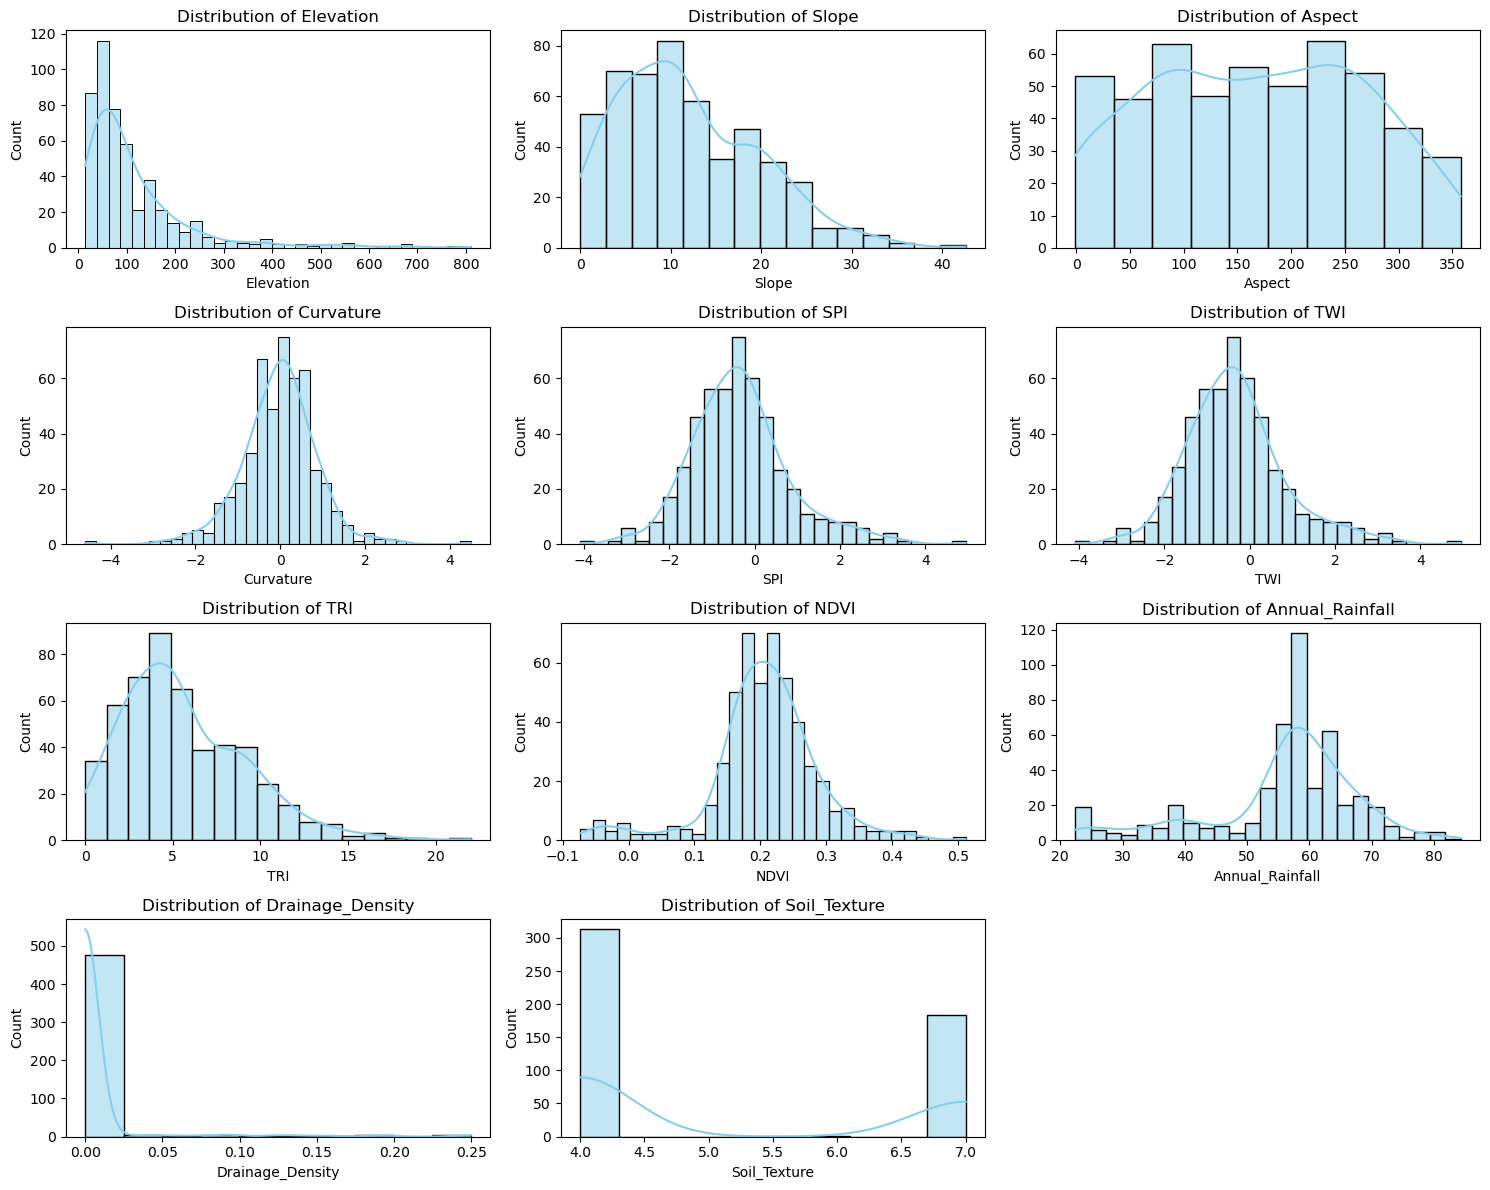

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features (excluding Latitude/Longitude)
numerical_features = ['Elevation', 'Slope', 'Aspect', 'Curvature', 'SPI', 'TWI', 'TRI', 'NDVI', 'Annual_Rainfall', 'Drainage_Density','Soil_Texture']

# Plot distributions
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_imputed[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

Check Class Balance of Landslide Column

Class Distribution (%):
Landslide
0    60.240964
1    39.759036
Name: proportion, dtype: float64


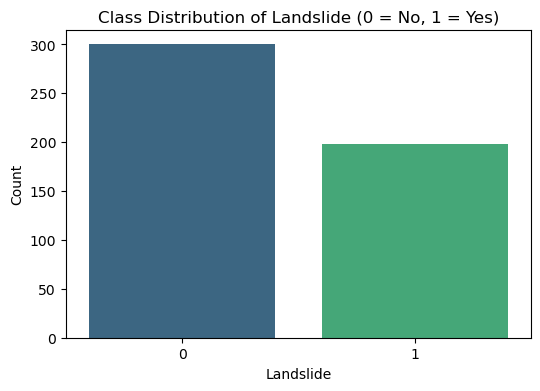

In [12]:
# Assuming df_imputed is your DataFrame
class_counts = df_imputed['Landslide'].value_counts(normalize=True) * 100

# Display the percentage of each class
print("Class Distribution (%):")
print(class_counts)

# Plotting
plt.figure(figsize=(6, 4))
sns.countplot(x='Landslide', data=df_imputed, palette='viridis')
plt.title('Class Distribution of Landslide (0 = No, 1 = Yes)')
plt.xlabel('Landslide')
plt.ylabel('Count')
plt.show()

Visualize Spatial Patterns (Latitude/Longitude)

In [13]:
data= df_imputed.copy()

In [14]:
data.shape

(498, 15)

In [15]:
data.to_csv('EDA_data.csv', index=False)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          498 non-null    float64
 1   Longitude         498 non-null    float64
 2   Elevation         498 non-null    int64  
 3   Slope             498 non-null    float64
 4   Aspect            498 non-null    float64
 5   Curvature         498 non-null    float64
 6   SPI               498 non-null    float64
 7   TWI               498 non-null    float64
 8   TRI               498 non-null    float64
 9   NDVI              498 non-null    float64
 10  LULC              498 non-null    float64
 11  Annual_Rainfall   498 non-null    float64
 12  Drainage_Density  498 non-null    float64
 13  Soil_Texture      498 non-null    float64
 14  Landslide         498 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 58.5 KB


# 🔹 Conduct Initial Tests to Confirm Spatial Sparsity:

•	Voronoi-Based Clustering

<Figure size 1000x1000 with 0 Axes>

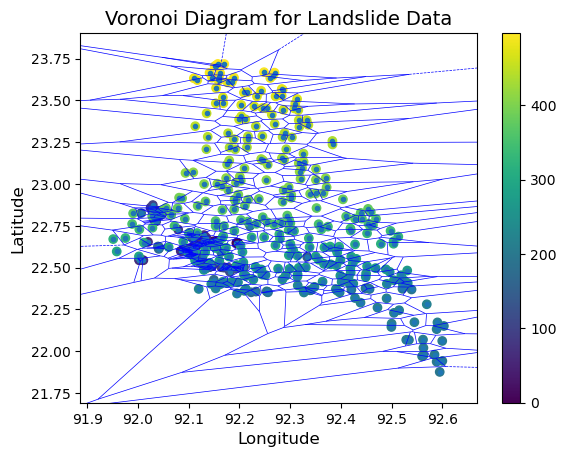

In [17]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to perform Voronoi-based clustering
def voronoi_clustering(data):
    points = data[['Longitude', 'Latitude']].values
    # Add small noise to avoid coplanarity issues
    noise = np.random.normal(0, 1e-6, points.shape)
    points_noisy = points + noise
    vor = Voronoi(points_noisy)
    return vor

# Perform Voronoi clustering
vor = voronoi_clustering(df_imputed)

# Plotting the Voronoi diagram
plt.figure(figsize=(10, 10))
voronoi_plot_2d(vor, show_vertices=False, line_colors='blue', line_width=0.5)

# Apply viridis color palette to the scatter plot
sc = plt.scatter(df_imputed['Longitude'], df_imputed['Latitude'], c=np.arange(len(df_imputed)), cmap='viridis')
plt.colorbar(sc)  # Show color bar
plt.title('Voronoi Diagram for Landslide Data', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Save the figure in high resolution
plt.savefig(r"H:\Figures and Map for Journal\Voronoi_orginal_Data.jpg", dpi=600, bbox_inches='tight')
plt.show()


Spatial Autocorrelation Metrics

a) Getis-Ord Gi*

('WARNING: ', 198, ' is an island (no neighbors)')
('WARNING: ', 218, ' is an island (no neighbors)')
('WARNING: ', 220, ' is an island (no neighbors)')
('WARNING: ', 302, ' is an island (no neighbors)')
('WARNING: ', 379, ' is an island (no neighbors)')
('WARNING: ', 388, ' is an island (no neighbors)')
('WARNING: ', 408, ' is an island (no neighbors)')
('WARNING: ', 448, ' is an island (no neighbors)')
('WARNING: ', 457, ' is an island (no neighbors)')
Getis-Ord Gi* Z-Scores: 0    0.490622
1    0.490622
2    0.552573
3    0.632745
4    1.085353
5    1.057795
6    1.054703
7    1.060782
8    1.060782
9    1.057795
Name: Gi_Star_Z, dtype: float64


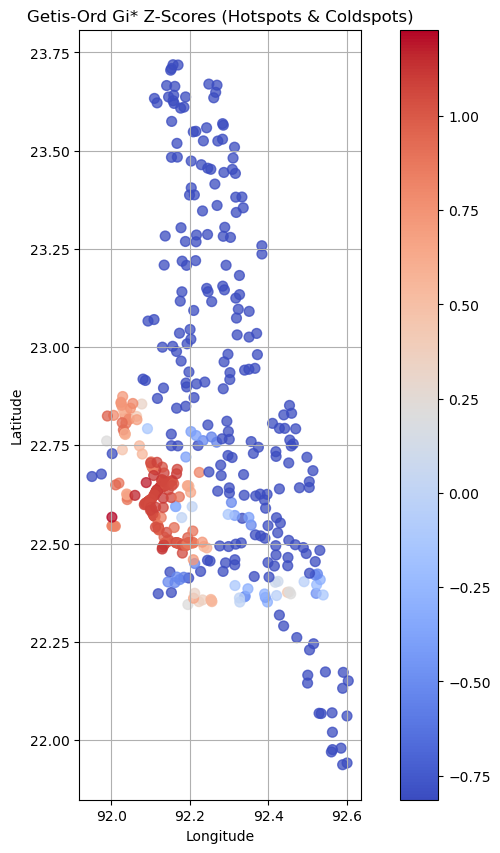

In [18]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.weights import DistanceBand
from esda.getisord import G_Local

def getis_ord_gi_star_corrected(data, lat_col, lon_col, feature_col, distance_threshold=0.05):
    """
    Computes the Getis-Ord Gi* statistics for spatial clustering of a given feature.
    
    Parameters:
    - data: Pandas DataFrame containing spatial and feature data
    - lat_col: Column name for latitude
    - lon_col: Column name for longitude
    - feature_col: Column name for the feature being analyzed
    - distance_threshold: Distance (in degrees) to define neighbors
    
    Returns:
    - GeoDataFrame with Gi* z-scores added
    """
    # Ensure feature column is numeric
    data[feature_col] = pd.to_numeric(data[feature_col], errors='coerce')

    # Drop NaN values
    data = data.dropna(subset=[feature_col])

    # Convert DataFrame to GeoDataFrame
    gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data[lon_col], data[lat_col]))

    # Create a spatial weights matrix
    w = DistanceBand.from_dataframe(gdf, threshold=distance_threshold, binary=True)
    w.transform = 'r'  # Normalize weights

    # Compute Getis-Ord Gi*
    g_star = G_Local(data[feature_col].values.astype(float), w)
    
    # Add Gi* Z-scores to GeoDataFrame
    gdf["Gi_Star_Z"] = g_star.Zs
    
    return gdf  # Return the updated GeoDataFrame with Gi* Z-scores

# Example usage
gdf_result = getis_ord_gi_star_corrected(df_imputed, 'Latitude', 'Longitude', 'Landslide')

# Display the first 10 Gi* Z-Scores
print("Getis-Ord Gi* Z-Scores:", gdf_result["Gi_Star_Z"].head(10))

# Visualization of Getis-Ord Gi* Results
plt.figure(figsize=(10, 10))  # Keep original figure creation
ax = plt.gca()  # Get current axis

gdf_result.plot(column="Gi_Star_Z", cmap="coolwarm", legend=True, ax=ax, markersize=50, alpha=0.75)

# Set plot title and labels
plt.title("Getis-Ord Gi* Z-Scores (Hotspots & Coldspots)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure in high resolution
plt.savefig(r"H:\Figures and Map for Journal\Getisord_original_Data.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


b) Moran's I

Moran's I_on orginal data: 0.7636161616161616


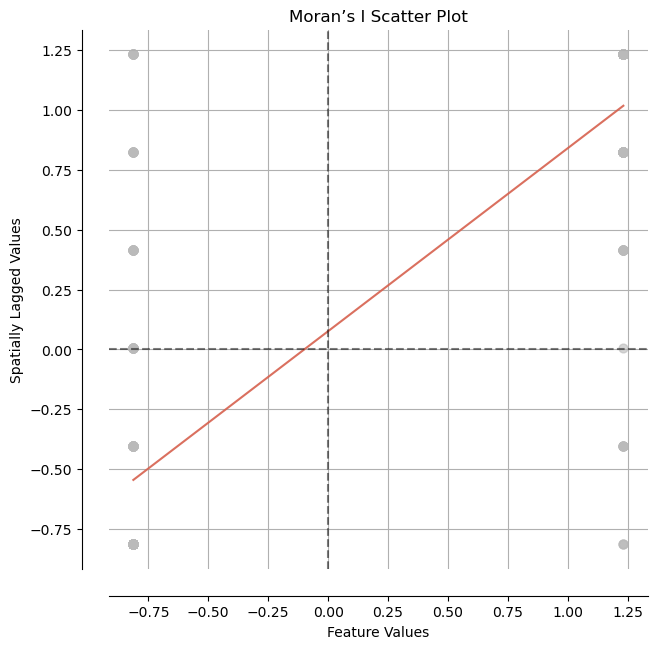

In [19]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.weights import KNN
from esda.moran import Moran
from splot.esda import moran_scatterplot

def calculate_morans_i_corrected(data, lat_col, lon_col, feature_col, k=5):
    """
    Computes Moran's I for spatial autocorrelation.

    Parameters:
    - data: Pandas DataFrame containing spatial and feature data
    - lat_col: Column name for latitude
    - lon_col: Column name for longitude
    - feature_col: Column name for the feature being analyzed
    - k: Number of nearest neighbors for spatial weighting (default is 5)

    Returns:
    - Moran's I statistic
    - Moran's object for further visualization
    """
    # Convert DataFrame to GeoDataFrame
    gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data[lon_col], data[lat_col]))

    # Create a k-Nearest Neighbors spatial weights matrix
    w = KNN.from_dataframe(gdf, k=k)
    w.transform = 'r'  # Row-standardized weights

    # Compute Moran's I
    moran = Moran(data[feature_col].values, w)

    return moran.I, moran  # Return Moran’s I statistic and Moran's object

# Example usage on your dataset
morans_i_value, moran_obj = calculate_morans_i_corrected(df_imputed, 'Latitude', 'Longitude', 'Landslide')

print(f"Moran's I_on orginal data: {morans_i_value}")

# Visualization: Moran's I scatter plot
fig, ax = moran_scatterplot(moran_obj, aspect_equal=True)
plt.title("Moran’s I Scatter Plot")
plt.xlabel("Feature Values")
plt.ylabel("Spatially Lagged Values")
plt.grid(True)

# Save the figure in high resolution
plt.savefig(r"H:\Figures and Map for Journal\MoransI_Original_Data.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


# Solving  Spatial Sparsity

Necessary Libraries and Load the data set

In [20]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from scipy.spatial import Voronoi, voronoi_plot_2d
from libpysal.weights import DistanceBand
from esda.moran import Moran
from esda.getisord import G_Local
from shapely.geometry import Point


# Load your dataset (ensure it has 'Latitude', 'Longitude', and 'Landslide' columns)
 
df = df_imputed.copy()

# Convert to GeoDataFrame
df['geometry'] = gpd.points_from_xy(df.Longitude, df.Latitude)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Drop rows with missing values (if any)
gdf.dropna(subset=['Latitude', 'Longitude', 'Landslide'], inplace=True)

•	Perform DBSCAN clustering for sparse regions

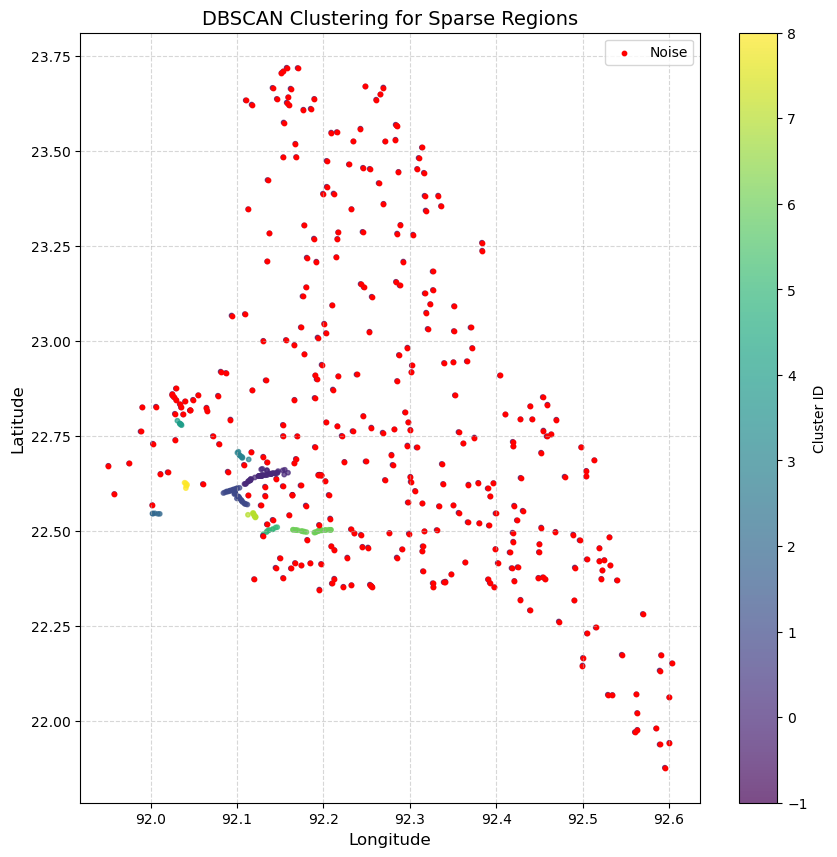

In [21]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df_imputed, geometry=gpd.points_from_xy(df_imputed["Longitude"], df_imputed["Latitude"]))

# Apply DBSCAN (tune eps based on your dataset scale)
dbscan = DBSCAN(eps=0.01, min_samples=5)  # Adjust 'eps' based on your dataset's spatial scale
gdf['Cluster'] = dbscan.fit_predict(gdf[['Longitude', 'Latitude']])

# Get unique clusters
unique_clusters = np.unique(gdf['Cluster'])

# Visualize Clusters
plt.figure(figsize=(10, 10))
scatter = plt.scatter(gdf['Longitude'], gdf['Latitude'], c=gdf['Cluster'], cmap='viridis', s=10, alpha=0.7)
plt.title('DBSCAN Clustering for Sparse Regions', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.colorbar(scatter, label="Cluster ID")

# Highlight noise points (-1 cluster)
if -1 in unique_clusters:
    noise_points = gdf[gdf['Cluster'] == -1]
    plt.scatter(noise_points['Longitude'], noise_points['Latitude'], c='red', s=10, label="Noise")

# Add legend for noise points
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure in high resolution
plt.savefig(r"H:\Figures and Map for Journal\DBSCAN_Clusters.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


•	Identify sparse clusters using spatial density

In [22]:
# Count points in each cluster
cluster_counts = gdf['Cluster'].value_counts()

# Compute the spatial density-based threshold
area_extent = (gdf['Longitude'].max() - gdf['Longitude'].min()) * (gdf['Latitude'].max() - gdf['Latitude'].min())
avg_density = len(gdf) / area_extent  # Points per unit area

# Define sparse clusters as those with density < 20% of the average density
sparse_clusters = cluster_counts[cluster_counts < (0.2 * avg_density * len(gdf))].index.tolist()
print("Sparse Clusters:", sparse_clusters)

# Mark sparse clusters
gdf['Sparse_Cluster'] = gdf['Cluster'].apply(lambda x: x in sparse_clusters)


Sparse Clusters: [-1, 0, 1, 6, 5, 7, 3, 4, 2, 8]


Visualize Voronoi Diagram with Density Contours

<Figure size 1000x1000 with 0 Axes>

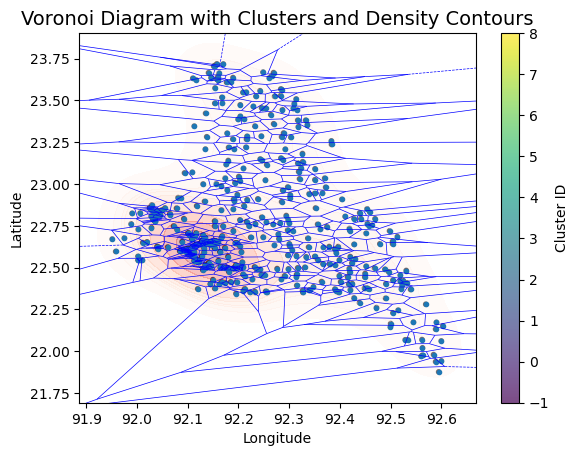

In [23]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d

def plot_voronoi_clusters(data, save_path=None):
    """
    Plots a Voronoi diagram with DBSCAN clusters and density contours.
    
    Parameters:
    - data: GeoDataFrame containing spatial data with 'Longitude', 'Latitude', and 'Cluster'.
    - save_path: Path to save the figure (if provided).
    """
    # Compute Voronoi diagram
    coords = data[['Longitude', 'Latitude']].values
    vor = Voronoi(coords)

    # Plot Voronoi diagram
    plt.figure(figsize=(10, 10))
    voronoi_plot_2d(vor, show_vertices=False, line_colors='blue', line_width=0.5)

    # Scatter plot of clustered points
    sc = plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], 
                     cmap='viridis', s=10, alpha=0.7, edgecolor='k')

    # Overlay density contours
    sns.kdeplot(x=data['Longitude'], y=data['Latitude'], cmap="Reds", fill=True, alpha=0.3)

    # Add titles and labels
    plt.title('Voronoi Diagram with Clusters and Density Contours', fontsize=14)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(sc, label="Cluster ID")

    # Save the figure in high resolution if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    # Show the plot
    plt.show()

# Example usage: Generate Voronoi diagram and save it
plot_voronoi_clusters(gdf, save_path=r"H:\Figures and Map for Journal\Voronoi_Clusters with DBSCAN.jpg")


In [24]:
# Save as CSV
gdf.to_csv('processed_clustered_dataset.csv', index=False)
print("Processed dataset saved as 'processed_clustered_dataset.csv'.")

Processed dataset saved as 'processed_clustered_dataset.csv'.


In [25]:
sparsity_free=gdf

In [26]:
sparsity_free.head()


,Latitude,Longitude,Elevation,Slope,Aspect,Curvature,SPI,TWI,TRI,NDVI,LULC,Annual_Rainfall,Drainage_Density,Soil_Texture,Landslide,geometry,Cluster,Sparse_Cluster
0,22.645184,92.197626,46,4.077521,310.236359,0.224299,-1.935804,-1.935804,1.987616,0.075623,7.0,57.196407,0.0,4.0,1,POINT (92.19763 22.64518),-1,True
1,22.646482,92.197168,41,2.732584,127.874985,0.000000,-3.042220,-3.042220,1.286204,0.086853,7.0,57.211571,0.0,4.0,1,POINT (92.19717 22.64648),-1,True
2,22.647297,92.195212,53,2.397054,90.000000,0.672897,-1.935804,-1.935804,1.490712,0.067504,7.0,57.211571,0.0,4.0,1,POINT (92.19521 22.6473),-1,True
3,22.646742,92.193913,43,5.756790,265.236359,0.448598,-1.485546,-1.485546,2.748737,0.055501,7.0,57.227306,0.0,4.0,1,POINT (92.19391 22.64674),-1,True
4,22.660147,92.155306,60,5.452793,254.744888,0.336448,-1.416456,-1.416456,4.876246,0.169679,7.0,57.192352,0.0,7.0,1,POINT (92.15531 22.66015),0,True


In [27]:
sparsity_free.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Latitude          498 non-null    float64 
 1   Longitude         498 non-null    float64 
 2   Elevation         498 non-null    int64   
 3   Slope             498 non-null    float64 
 4   Aspect            498 non-null    float64 
 5   Curvature         498 non-null    float64 
 6   SPI               498 non-null    float64 
 7   TWI               498 non-null    float64 
 8   TRI               498 non-null    float64 
 9   NDVI              498 non-null    float64 
 10  LULC              498 non-null    float64 
 11  Annual_Rainfall   498 non-null    float64 
 12  Drainage_Density  498 non-null    float64 
 13  Soil_Texture      498 non-null    float64 
 14  Landslide         498 non-null    int64   
 15  geometry          498 non-null    geometry
 16  Cluster           

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          498 non-null    float64
 1   Longitude         498 non-null    float64
 2   Elevation         498 non-null    int64  
 3   Slope             498 non-null    float64
 4   Aspect            498 non-null    float64
 5   Curvature         498 non-null    float64
 6   SPI               498 non-null    float64
 7   TWI               498 non-null    float64
 8   TRI               498 non-null    float64
 9   NDVI              498 non-null    float64
 10  LULC              498 non-null    float64
 11  Annual_Rainfall   498 non-null    float64
 12  Drainage_Density  498 non-null    float64
 13  Soil_Texture      498 non-null    float64
 14  Landslide         498 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 58.5 KB


# Features Important

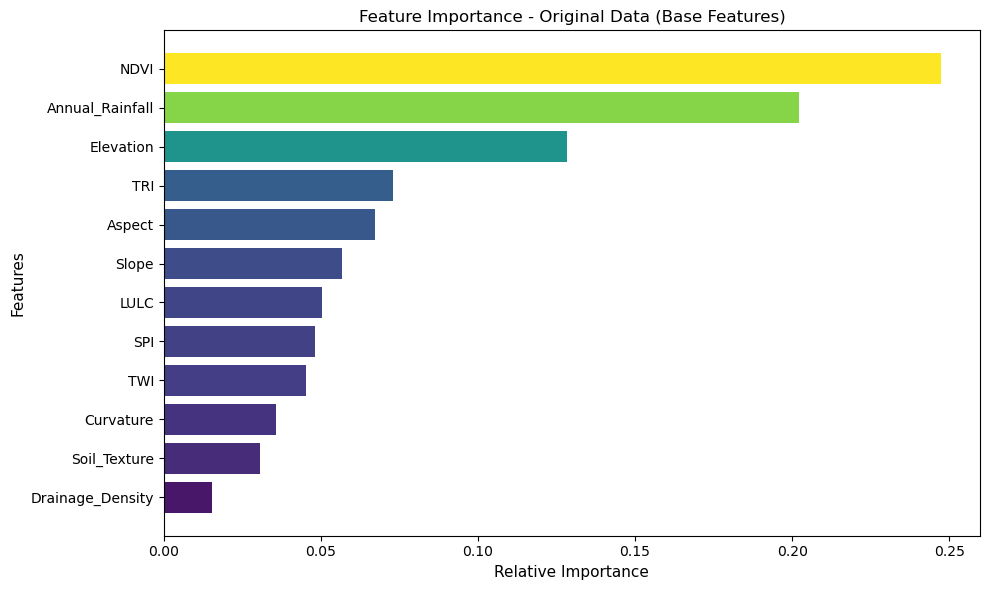

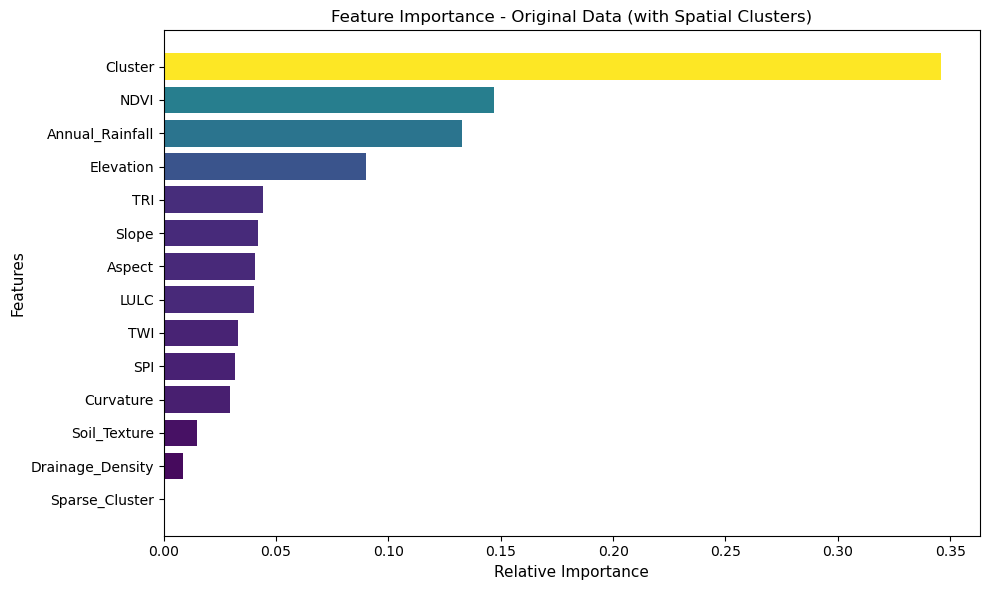

Feature importance plots saved and displayed successfully!


In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import os

# Set up output directory
output_dir = r"H:\Figures and Map for Journal"
os.makedirs(output_dir, exist_ok=True)

# Function to plot and save feature importance
def plot_feature_importance(features, importances, title, filename):
    # Sort features by importance
    sorted_idx = np.argsort(importances)
    sorted_features = np.array(features)[sorted_idx]
    sorted_importances = importances[sorted_idx]
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(features)), sorted_importances, 
             color=plt.cm.viridis(sorted_importances / max(sorted_importances)))
    plt.yticks(range(len(features)), sorted_features, fontsize=10)
    plt.xticks(fontsize=10)
    plt.title(f"Feature Importance - {title}", fontsize=12)
    plt.xlabel("Relative Importance", fontsize=11)
    plt.ylabel("Features", fontsize=11)
    plt.tight_layout()
    
    # Save figure
    plt.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight', format='jpg')
    plt.show()

# Function to process data and train model
def process_data(data, title_suffix, filename):
    # Prepare data
    X = data.drop(['Landslide', 'Latitude', 'Longitude'], axis=1)
    y = data['Landslide']
    
    # Train model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Get feature importance
    importances = model.feature_importances_
    features = X.columns
    
    # Plot and save
    plot_feature_importance(features, importances, f"Original Data {title_suffix}", filename)

# Process original dataset
process_data(data, "(Base Features)", "FeatureImportance_Base.jpg")

# Process sparsity-free dataset
# Convert boolean to int for modeling
sparsity_free['Sparse_Cluster'] = sparsity_free['Sparse_Cluster'].astype(int)
process_data(sparsity_free.drop(columns='geometry'), "(with Spatial Clusters)", "FeatureImportance_SpatialClusters.jpg")

print("Feature importance plots saved and displayed successfully!")

# I will go with this Script

Training Sparsity_Free_DNN...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4943 - loss: 1.5655 - val_accuracy: 0.6200 - val_loss: 1.4547
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5995 - loss: 1.4507 - val_accuracy: 0.6400 - val_loss: 1.3549
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6631 - loss: 1.3315 - val_accuracy: 0.7000 - val_loss: 1.2615
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6714 - loss: 1.2462 - val_accuracy: 0.7500 - val_loss: 1.1746
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7225 - loss: 1.1577 - val_accuracy: 0.7800 - val_loss: 1.0910
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7599 - loss: 1.0863 - val_accuracy: 0.7700 - val_loss: 1.0172
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8265 - loss: 0.9832 - val_accuracy: 0.7800 - val_loss: 0.9494
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8532 - loss: 0.9149 - v

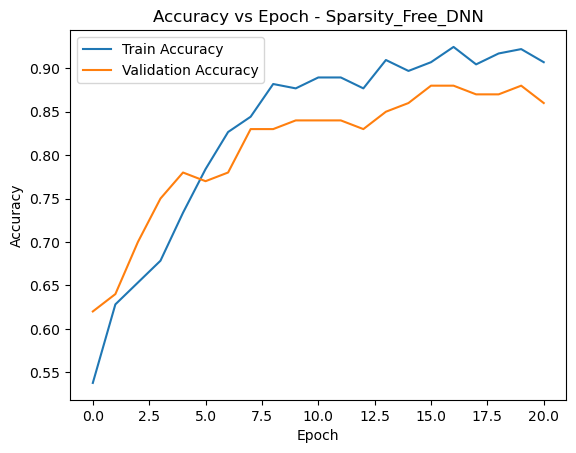

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


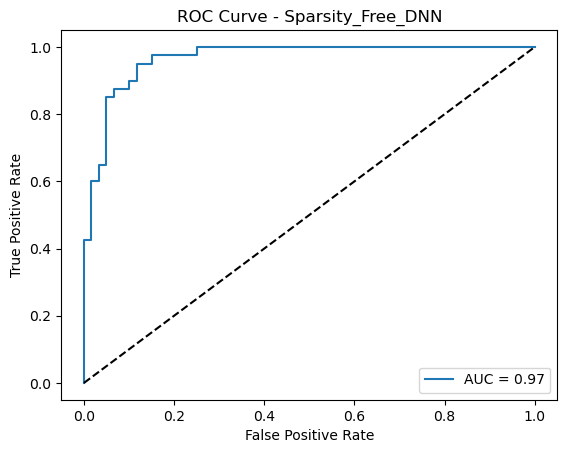

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training Sparsity_Free_1D CNN...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6799 - loss: 1.4490 - val_accuracy: 0.6800 - val_loss: 1.2368
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6897 - loss: 1.1993 - val_accuracy: 0.8000 - val_loss: 1.0292
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8641 - loss: 0.9742 - val_accuracy: 0.8300 - val_loss: 0.8704
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8766 - loss: 0.8261 - val_accuracy: 0.8400 - val_loss: 0.7683
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9165 - loss: 0.7089 - val_accuracy: 0.8600 - val_loss: 0.6938
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8895 - loss: 0.6776 - val_accuracy: 0.8600 - val_loss: 0.6443
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8800 - loss: 0.6494 - val_accuracy: 0.8700 - val_loss: 0.6033
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

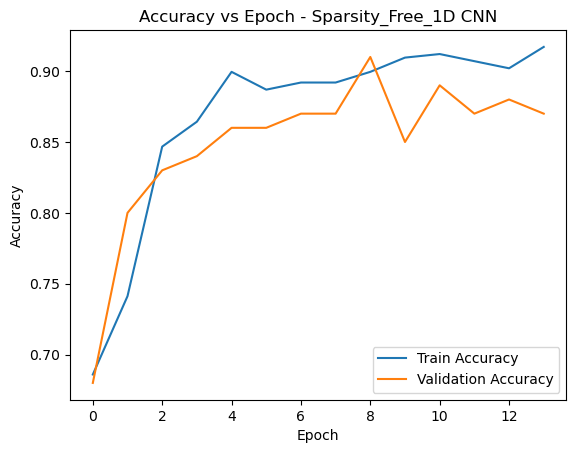

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


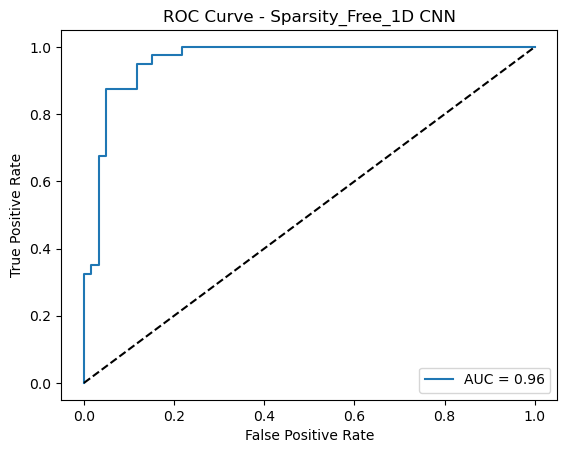

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training Sparsity_Free_LSTM...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.5436 - loss: 0.6808 - val_accuracy: 0.6000 - val_loss: 0.6235
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5987 - loss: 0.6367 - val_accuracy: 0.6100 - val_loss: 0.6122
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6589 - loss: 0.5915 - val_accuracy: 0.6200 - val_loss: 0.6055
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6753 - loss: 0.5921 - val_accuracy: 0.6400 - val_loss: 0.5929
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6659 - loss: 0.6064 - val_accuracy: 0.6500 - val_loss: 0.5905
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6803 - loss: 0.5864 - val_accuracy: 0.6400 - val_loss: 0.5855
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6848 - loss: 0.5727 - val_accuracy: 0.7000 - val_loss: 0.5762
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s

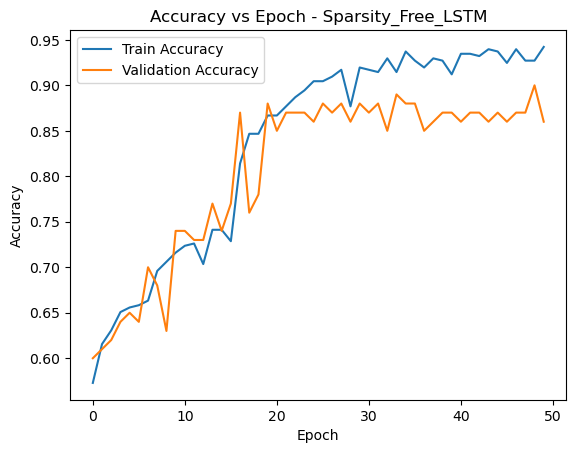

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step


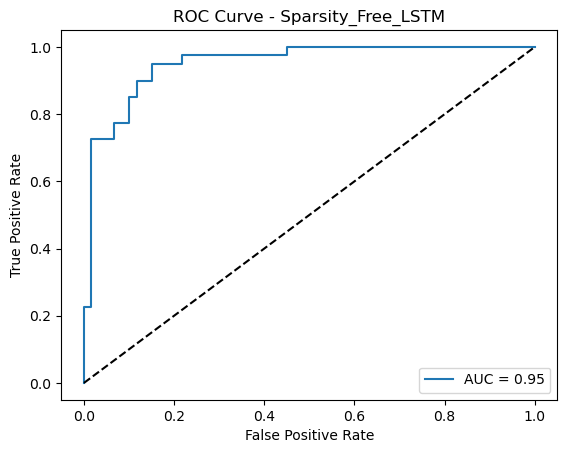

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Training EDA_Data_DNN...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5613 - loss: 1.5266 - val_accuracy: 0.6000 - val_loss: 1.4109
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5867 - loss: 1.4139 - val_accuracy: 0.6000 - val_loss: 1.3196
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6124 - loss: 1.3283 - val_accuracy: 0.6300 - val_loss: 1.2393
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6729 - loss: 1.2167 - val_accuracy: 0.6400 - val_loss: 1.1663
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6717 - loss: 1.1762 - val_accuracy: 0.7000 - val_loss: 1.0987
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7144 - loss: 1.1138 - val_accuracy: 0.7100 - val_loss: 1.0358
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7954 - loss: 1.0454 - val_accuracy: 0.7400 - val_loss: 0.9765
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - a

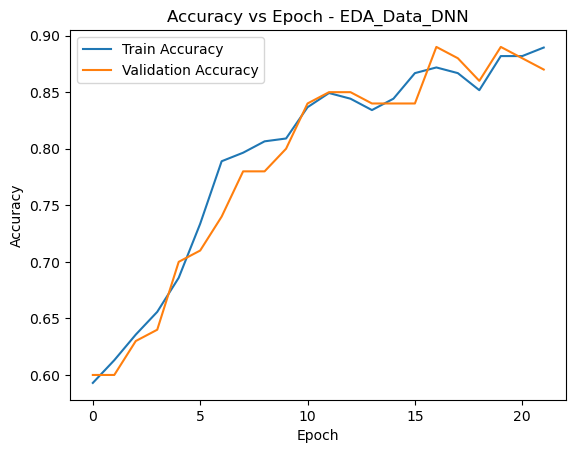

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


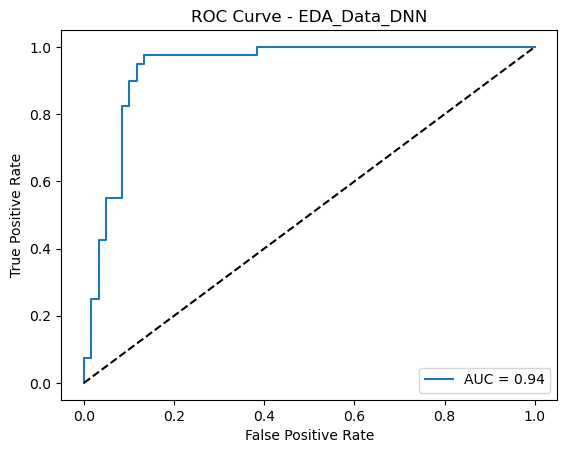

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training EDA_Data_1D CNN...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5155 - loss: 1.4737 - val_accuracy: 0.6100 - val_loss: 1.2731
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6190 - loss: 1.2299 - val_accuracy: 0.6400 - val_loss: 1.0733
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7308 - loss: 1.0335 - val_accuracy: 0.7600 - val_loss: 0.9093
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8105 - loss: 0.9003 - val_accuracy: 0.7900 - val_loss: 0.7931
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8203 - loss: 0.7893 - val_accuracy: 0.8400 - val_loss: 0.7129
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8265 - loss: 0.7108 - val_accuracy: 0.8300 - val_loss: 0.6589
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8437 - loss: 0.6687 - val_accuracy: 0.8400 - val_loss: 0.6157
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

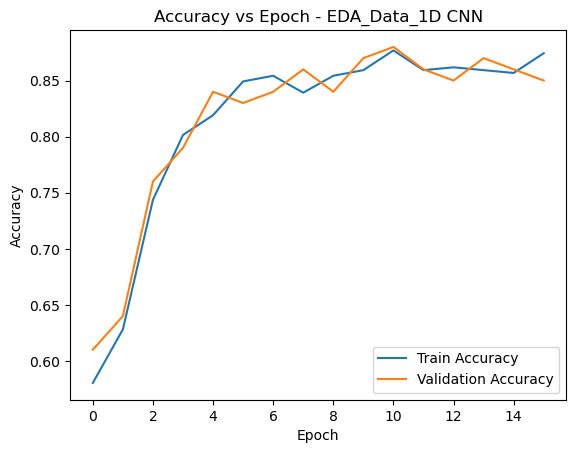

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


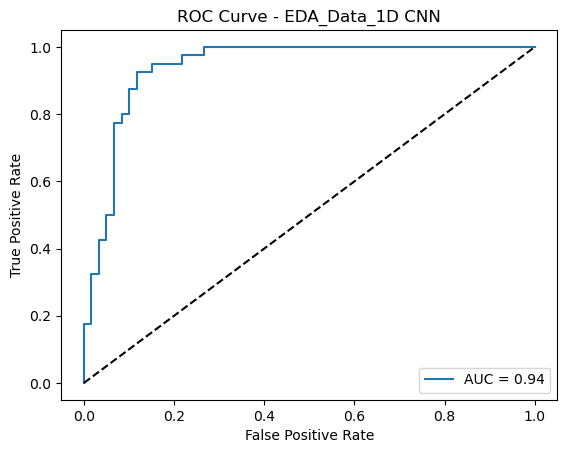

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training EDA_Data_LSTM...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.5208 - loss: 0.6813 - val_accuracy: 0.6000 - val_loss: 0.6207
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6358 - loss: 0.6148 - val_accuracy: 0.6000 - val_loss: 0.6216
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5916 - loss: 0.6373 - val_accuracy: 0.5900 - val_loss: 0.6279
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5892 - loss: 0.6414 - val_accuracy: 0.5700 - val_loss: 0.6133
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6176 - loss: 0.6221 - val_accuracy: 0.5800 - val_loss: 0.6091
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6651 - loss: 0.6182 - val_accuracy: 0.6000 - val_loss: 0.6039
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6699 - loss: 0.6245 - val_accuracy: 0.6200 - val_loss: 0.5951
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms

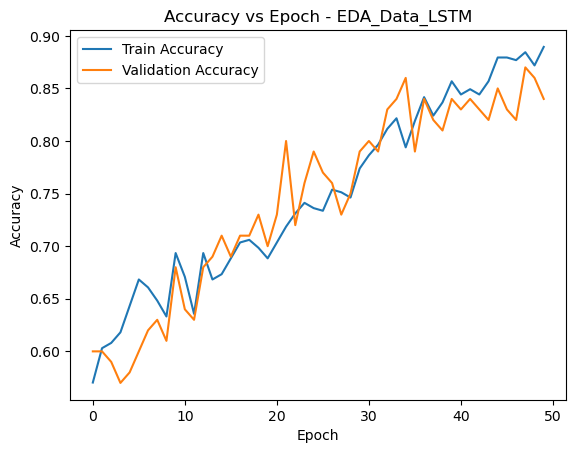

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step


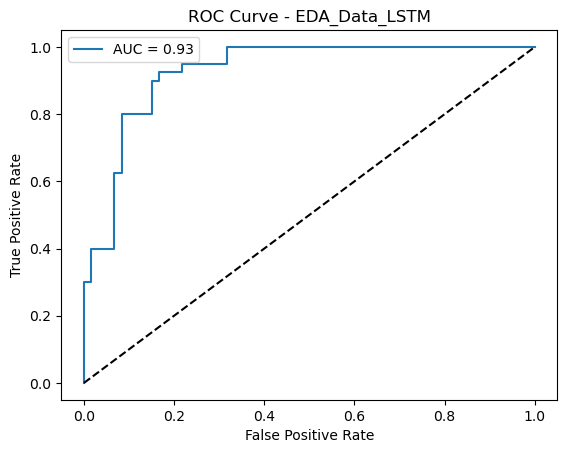

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


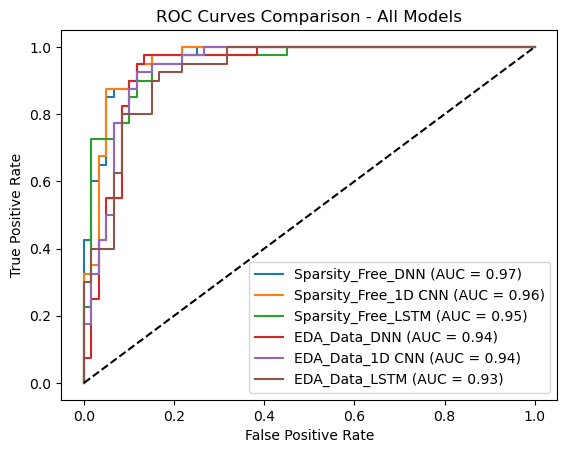

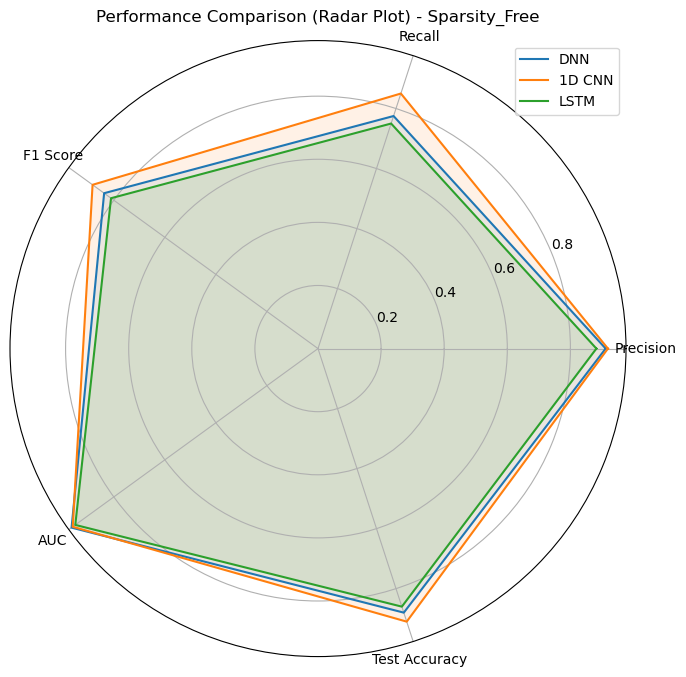

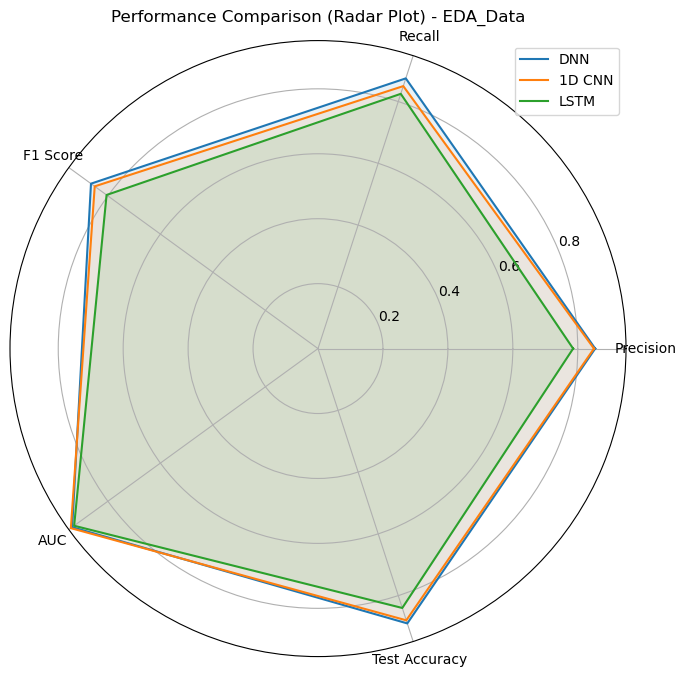

Process completed successfully.


In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import os

# Define save path
save_path = r"H:\Figures for Journal"
os.makedirs(save_path, exist_ok=True)

# Load Data
data_path = r"H:\Thesis Data set\Journal Data Set\EDA_data.csv"
try:
    df_eda = pd.read_csv(data_path)  # Second dataset
    df_sparsity = sparsity_free      # First dataset (assumed in memory; replace with pd.read_csv if needed)
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    exit()

# Define features and target
features_sparsity = ['Elevation', 'Slope', 'Aspect', 'Curvature', 'SPI', 'TWI', 'TRI',
                     'NDVI', 'Annual_Rainfall', 'Drainage_Density', 'LULC', 'Soil_Texture', 'Cluster']
features_eda = ['Elevation', 'Slope', 'Aspect', 'Curvature', 'SPI', 'TWI', 'TRI',
                'NDVI', 'Annual_Rainfall', 'Drainage_Density', 'LULC', 'Soil_Texture']
target = 'Landslide'

# Prepare datasets
datasets = {
    'Sparsity_Free': (df_sparsity[features_sparsity].values, df_sparsity[target].values, df_sparsity),
    'EDA_Data': (df_eda[features_eda].values, df_eda[target].values, df_eda)
}

### Define Models with Regularization and Complexity Adjustments
def build_dnn(input_dim):
    model = keras.Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,), kernel_regularizer=keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_1dcnn(input_dim):
    model = keras.Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_dim, 1), kernel_regularizer=keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Flatten(),
        Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm(input_dim):
    # LSTM remains without L2, Dropout, or Early Stopping as per previous request
    model = keras.Sequential([
        LSTM(128, return_sequences=True, input_shape=(input_dim, 1)),
        LSTM(64),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and Evaluate Models
models = {}
results = {}

for dataset_name, (X, y, df) in datasets.items():
    try:
        # Train-Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Normalize Features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Reshape for CNN & LSTM
        X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

        # Define model instances
        model_types = {
            'DNN': build_dnn(X_train.shape[1]),
            '1D CNN': build_1dcnn(X_train.shape[1]),
            'LSTM': build_lstm(X_train.shape[1])
        }

        for model_name, model in model_types.items():
            full_model_name = f"{dataset_name}_{model_name}"
            print(f"Training {full_model_name}...")
            
            X_train_input = X_train if model_name == 'DNN' else X_train_cnn
            X_test_input = X_test if model_name == 'DNN' else X_test_cnn
            
            # Early stopping for DNN and CNN only
            if model_name in ['DNN', '1D CNN']:
                early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
                history = model.fit(X_train_input, y_train, epochs=50, batch_size=32, 
                                  validation_data=(X_test_input, y_test), callbacks=[early_stopping], verbose=1)
            else:  # LSTM without early stopping
                history = model.fit(X_train_input, y_train, epochs=50, batch_size=32, 
                                  validation_data=(X_test_input, y_test), verbose=1)

            # Plot Accuracy vs Epoch
            plt.figure()
            plt.plot(history.history['accuracy'], label='Train Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title(f'Accuracy vs Epoch - {full_model_name}')
            plt.legend()
            plt.savefig(os.path.join(save_path, f'{full_model_name}_Accuracy_Epoch.png'), dpi=600, bbox_inches='tight')
            plt.show()
            plt.close()

            # Evaluation
            y_pred_prob = model.predict(X_test_input, batch_size=32).flatten()
            y_pred = (y_pred_prob > 0.5).astype(int)
            
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            roc_auc = auc(fpr, tpr)

            # Save metrics
            results[full_model_name] = {
                'AUC': roc_auc,
                'Train Accuracy': history.history['accuracy'][-1],
                'Test Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred)
            }

            # Plot and save individual ROC Curve
            plt.figure()
            plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {full_model_name}')
            plt.legend()
            plt.savefig(os.path.join(save_path, f'{full_model_name}_ROC.png'), dpi=600, bbox_inches='tight')
            plt.show()
            plt.close()

            # Generate and save susceptibility
            scaled_data = scaler.transform(X)
            if model_name != 'DNN':
                scaled_data = scaled_data.reshape((-1, X_train.shape[1], 1))
            df[f'{model_name}_Susceptibility'] = model.predict(scaled_data, batch_size=32).flatten()
            df[['Latitude', 'Longitude', f'{model_name}_Susceptibility']].to_csv(
                os.path.join(save_path, f'{full_model_name}_susceptibility.csv'), index=False)

            # Store model and test data for ROC comparison
            models[full_model_name] = (model, X_test_input, y_test)

    except Exception as e:
        print(f"Error processing {dataset_name}: {e}")
        continue

# ROC Comparison Plot
plt.figure()
for full_model_name, (model, X_test_input, y_test) in models.items():
    y_pred_prob = model.predict(X_test_input, batch_size=32).flatten()
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{full_model_name} (AUC = {results[full_model_name]["AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison - All Models')
plt.legend()
plt.savefig(os.path.join(save_path, 'ROC_Comparison.png'), dpi=600, bbox_inches='tight')
plt.show()
plt.close()

# Radar Plots (one per dataset)
labels = ['Precision', 'Recall', 'F1 Score', 'AUC', 'Test Accuracy']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

for dataset_name in datasets:
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)
    for model_name in ['DNN', '1D CNN', 'LSTM']:
        full_model_name = f"{dataset_name}_{model_name}"
        if full_model_name in results:
            values = [results[full_model_name][metric] for metric in labels]
            values += values[:1]  # Close the loop
            ax.plot(angles, values, label=model_name)
            ax.fill(angles, values, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(f'Performance Comparison (Radar Plot) - {dataset_name}')
    plt.legend()
    plt.savefig(os.path.join(save_path, f'{dataset_name}_Radar_Plot.png'), dpi=600, bbox_inches='tight')
    plt.show()
    plt.close()

# Save results
try:
    pd.DataFrame(results).T.to_csv(os.path.join(save_path, 'Model_Metrics.csv'))
    print("Process completed successfully.")
except Exception as e:
    print(f"Error saving results: {e}")

Training Enhanced_Dataset_DNN...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.4966 - loss: 1.5752 - val_accuracy: 0.6800 - val_loss: 1.4661
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7331 - loss: 1.4437 - val_accuracy: 0.7200 - val_loss: 1.3654
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7145 - loss: 1.3394 - val_accuracy: 0.7400 - val_loss: 1.2689
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7391 - loss: 1.2303 - val_accuracy: 0.7700 - val_loss: 1.1765
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7792 - loss: 1.1410 - val_accuracy: 0.7900 - val_loss: 1.0913
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8210 - loss: 1.0542 - val_accuracy: 0.7900 - val_loss: 1.0094
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8531 - loss: 0.9682 - val_accuracy: 0.8000 - val_loss: 0.9384
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8525 - loss: 0.8975

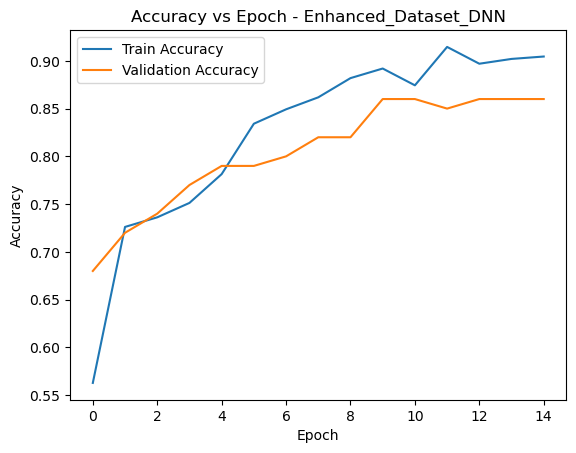

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


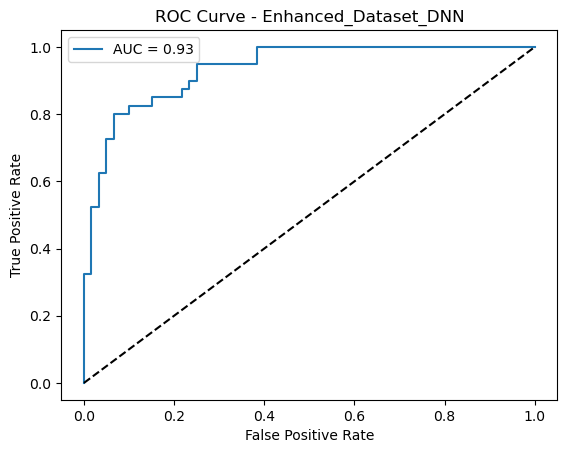

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training Enhanced_Dataset_1D CNN...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4963 - loss: 1.5006 - val_accuracy: 0.6700 - val_loss: 1.3013
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7100 - loss: 1.2591 - val_accuracy: 0.7400 - val_loss: 1.0919
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7830 - loss: 1.0462 - val_accuracy: 0.8300 - val_loss: 0.8995
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8518 - loss: 0.8565 - val_accuracy: 0.8400 - val_loss: 0.7660
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8739 - loss: 0.7295 - val_accuracy: 0.8900 - val_loss: 0.6631
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9054 - loss: 0.6296 - val_accuracy: 0.8600 - val_loss: 0.6033
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8802 - loss: 0.6306 - val_accuracy: 0.8500 - val_loss: 0.5783
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 

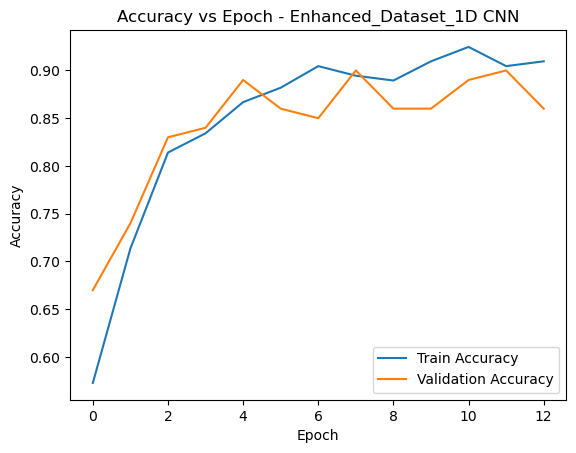

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


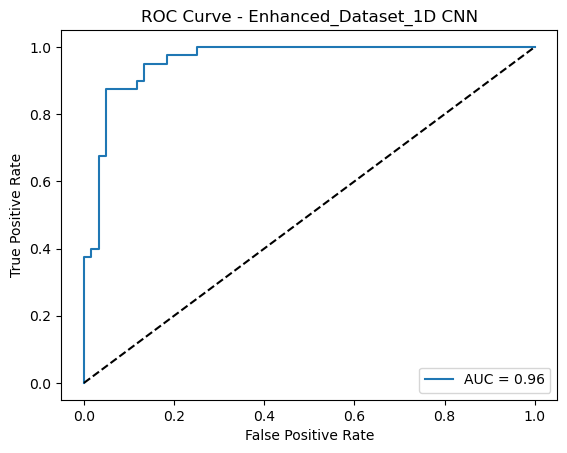

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training Enhanced_Dataset_LSTM...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.5397 - loss: 0.6859 - val_accuracy: 0.6200 - val_loss: 0.6315
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6308 - loss: 0.6426 - val_accuracy: 0.5800 - val_loss: 0.6204
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6160 - loss: 0.6176 - val_accuracy: 0.6200 - val_loss: 0.6106
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6449 - loss: 0.6007 - val_accuracy: 0.6400 - val_loss: 0.6047
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6353 - loss: 0.6220 - val_accuracy: 0.6400 - val_loss: 0.6025
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6657 - loss: 0.5868 - val_accuracy: 0.6800 - val_loss: 0.5916
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6738 - loss: 0.5927 - val_accuracy: 0.6800 - val_loss: 0.5835
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━

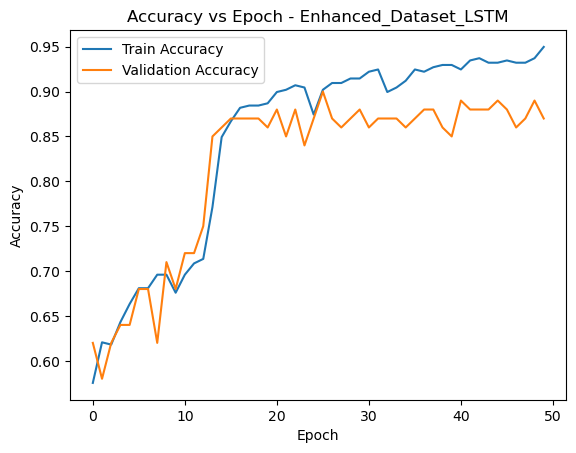

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step


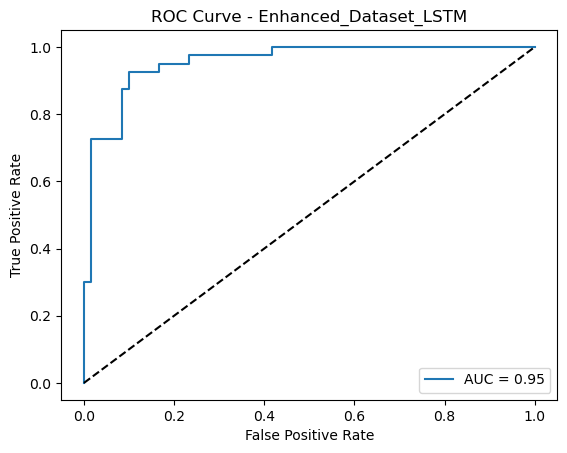

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Training Original_Data_DNN...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4040 - loss: 1.6102 - val_accuracy: 0.5300 - val_loss: 1.4752
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6113 - loss: 1.4444 - val_accuracy: 0.6300 - val_loss: 1.3853
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6563 - loss: 1.3556 - val_accuracy: 0.6300 - val_loss: 1.3054
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6304 - loss: 1.3149 - val_accuracy: 0.7100 - val_loss: 1.2280
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6929 - loss: 1.2122 - val_accuracy: 0.7400 - val_loss: 1.1565
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7039 - loss: 1.1531 - val_accuracy: 0.7600 - val_loss: 1.0908
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7481 - loss: 1.1147 - val_accuracy: 0.8000 - val_loss: 1.0324
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

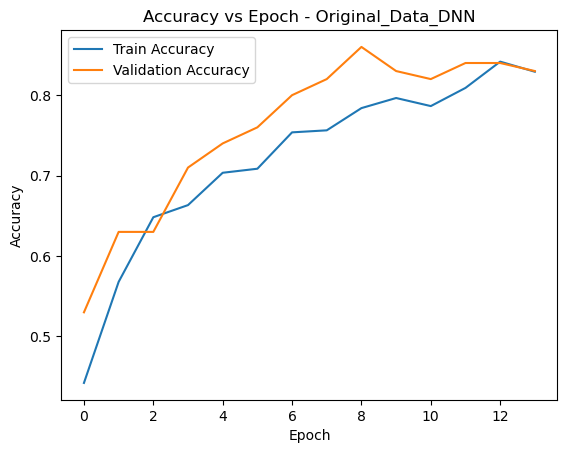

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


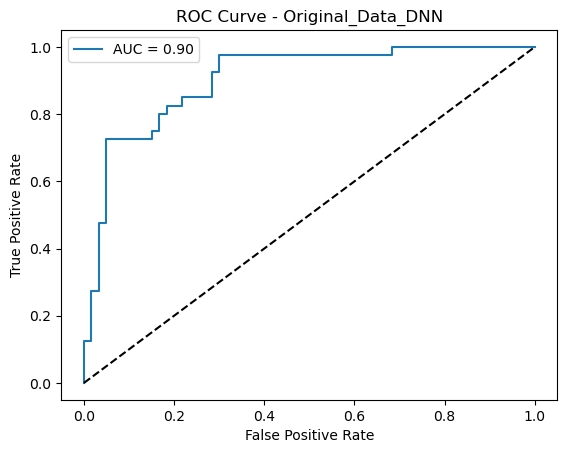

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training Original_Data_1D CNN...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4813 - loss: 1.4934 - val_accuracy: 0.6300 - val_loss: 1.3030
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6582 - loss: 1.2569 - val_accuracy: 0.6600 - val_loss: 1.1119
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7342 - loss: 1.0806 - val_accuracy: 0.7500 - val_loss: 0.9578
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7986 - loss: 0.9565 - val_accuracy: 0.7900 - val_loss: 0.8391
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8279 - loss: 0.8182 - val_accuracy: 0.8300 - val_loss: 0.7491
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8536 - loss: 0.7499 - val_accuracy: 0.8600 - val_loss: 0.6832
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8345 - loss: 0.6926 - val_accuracy: 0.8500 - val_loss: 0.6438
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

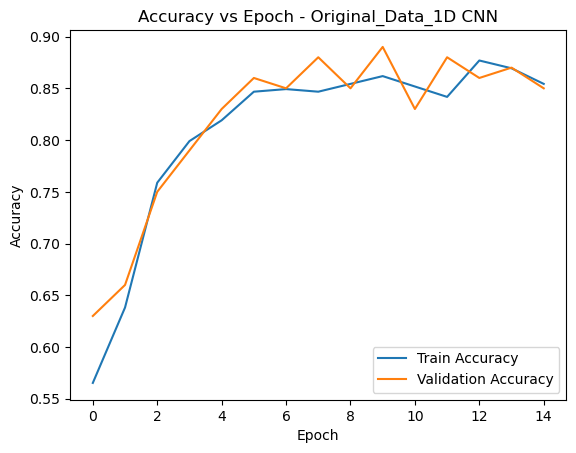

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


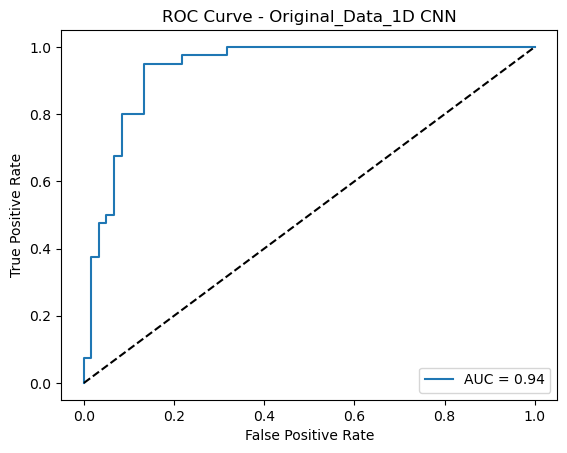

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training Original_Data_LSTM...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.5674 - loss: 0.6795 - val_accuracy: 0.6000 - val_loss: 0.6238
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5781 - loss: 0.6423 - val_accuracy: 0.6000 - val_loss: 0.6228
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6178 - loss: 0.6131 - val_accuracy: 0.5700 - val_loss: 0.6208
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6252 - loss: 0.6290 - val_accuracy: 0.5800 - val_loss: 0.6201
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6522 - loss: 0.6018 - val_accuracy: 0.5700 - val_loss: 0.6137
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6522 - loss: 0.6203 - val_accuracy: 0.6300 - val_loss: 0.6083
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6583 - loss: 0.6080 - val_accuracy: 0.6200 - val_loss: 0.6050
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s

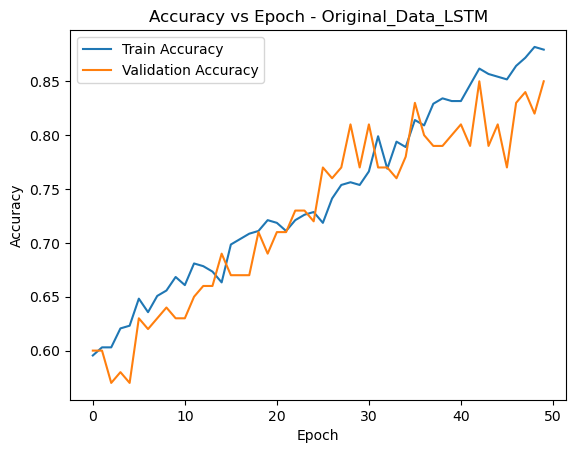

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step


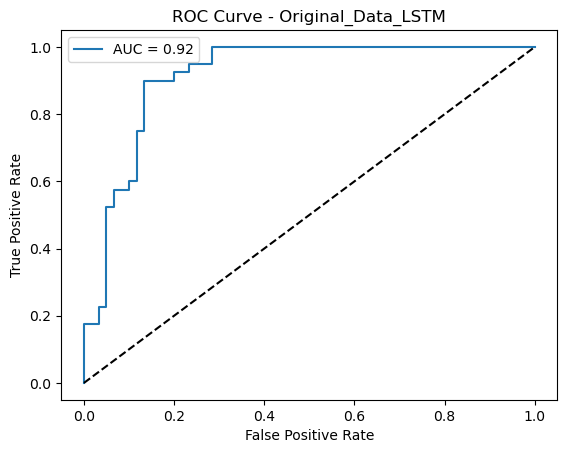

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


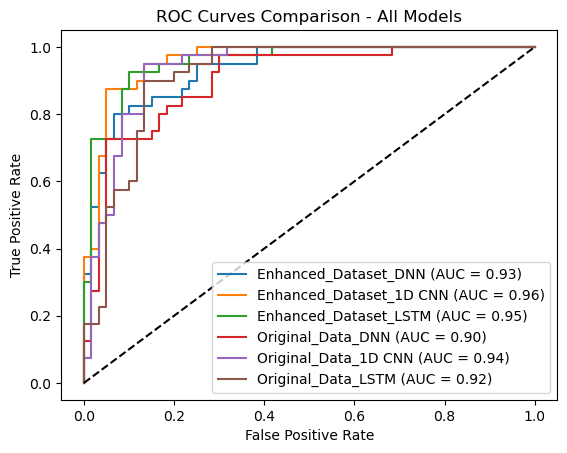

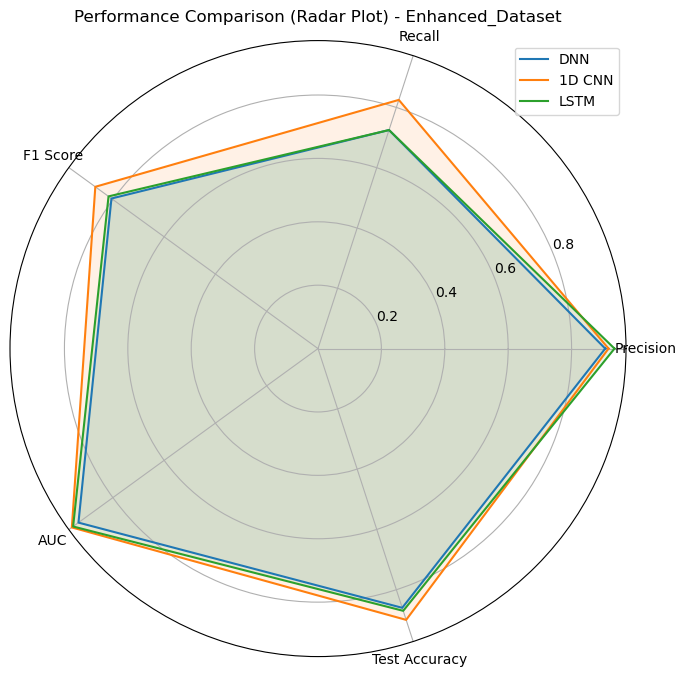

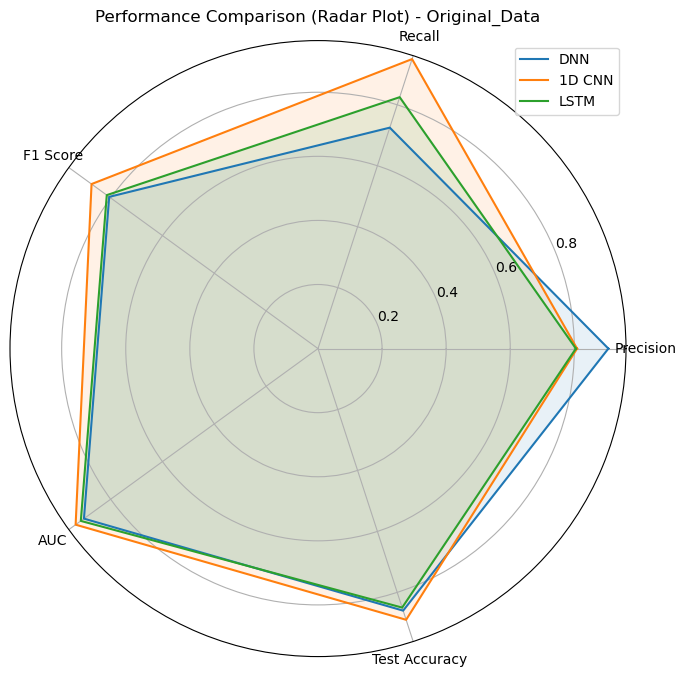

Process completed successfully.


In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import os

# Define save path
save_path = r"H:\Figures for Journal"
os.makedirs(save_path, exist_ok=True)

# Load Data
data_path = r"H:\Thesis Data set\Journal Data Set\EDA_data.csv"
try:
    df_original = pd.read_csv(data_path)  # Original dataset
    df_enhanced = sparsity_free          # Enhanced dataset (assumed in memory; replace with pd.read_csv if needed)
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    exit()

# Define features and target
features_enhanced = ['Elevation', 'Slope', 'Aspect', 'Curvature', 'SPI', 'TWI', 'TRI',
                     'NDVI', 'Annual_Rainfall', 'Drainage_Density', 'LULC', 'Soil_Texture', 'Cluster']
features_original = ['Elevation', 'Slope', 'Aspect', 'Curvature', 'SPI', 'TWI', 'TRI',
                     'NDVI', 'Annual_Rainfall', 'Drainage_Density', 'LULC', 'Soil_Texture']
target = 'Landslide'

# Prepare datasets
datasets = {
    'Enhanced_Dataset': (df_enhanced[features_enhanced].values, df_enhanced[target].values, df_enhanced),
    'Original_Data': (df_original[features_original].values, df_original[target].values, df_original)
}

### Define Models with Regularization and Complexity Adjustments
def build_dnn(input_dim):
    model = keras.Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,), kernel_regularizer=keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_1dcnn(input_dim):
    model = keras.Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_dim, 1), kernel_regularizer=keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Flatten(),
        Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm(input_dim):
    # LSTM remains without L2, Dropout, or Early Stopping as per previous request
    model = keras.Sequential([
        LSTM(128, return_sequences=True, input_shape=(input_dim, 1)),
        LSTM(64),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and Evaluate Models
models = {}
results = {}

for dataset_name, (X, y, df) in datasets.items():
    try:
        # Train-Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Normalize Features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Reshape for CNN & LSTM
        X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

        # Define model instances
        model_types = {
            'DNN': build_dnn(X_train.shape[1]),
            '1D CNN': build_1dcnn(X_train.shape[1]),
            'LSTM': build_lstm(X_train.shape[1])
        }

        for model_name, model in model_types.items():
            full_model_name = f"{dataset_name}_{model_name}"
            print(f"Training {full_model_name}...")
            
            X_train_input = X_train if model_name == 'DNN' else X_train_cnn
            X_test_input = X_test if model_name == 'DNN' else X_test_cnn
            
            # Early stopping for DNN and CNN only
            if model_name in ['DNN', '1D CNN']:
                early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
                history = model.fit(X_train_input, y_train, epochs=50, batch_size=32, 
                                  validation_data=(X_test_input, y_test), callbacks=[early_stopping], verbose=1)
            else:  # LSTM without early stopping
                history = model.fit(X_train_input, y_train, epochs=50, batch_size=32, 
                                  validation_data=(X_test_input, y_test), verbose=1)

            # Plot Accuracy vs Epoch
            plt.figure()
            plt.plot(history.history['accuracy'], label='Train Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title(f'Accuracy vs Epoch - {full_model_name}')
            plt.legend()
            plt.savefig(os.path.join(save_path, f'{full_model_name}_Accuracy_Epoch.png'), dpi=600, bbox_inches='tight')
            plt.show()
            plt.close()

            # Evaluation
            y_pred_prob = model.predict(X_test_input, batch_size=32).flatten()
            y_pred = (y_pred_prob > 0.5).astype(int)
            
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            roc_auc = auc(fpr, tpr)

            # Save metrics
            results[full_model_name] = {
                'AUC': roc_auc,
                'Train Accuracy': history.history['accuracy'][-1],
                'Test Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred)
            }

            # Plot and save individual ROC Curve
            plt.figure()
            plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {full_model_name}')
            plt.legend()
            plt.savefig(os.path.join(save_path, f'{full_model_name}_ROC.png'), dpi=600, bbox_inches='tight')
            plt.show()
            plt.close()

            # Generate and save susceptibility
            scaled_data = scaler.transform(X)
            if model_name != 'DNN':
                scaled_data = scaled_data.reshape((-1, X_train.shape[1], 1))
            df[f'{model_name}_Susceptibility'] = model.predict(scaled_data, batch_size=32).flatten()
            df[['Latitude', 'Longitude', f'{model_name}_Susceptibility']].to_csv(
                os.path.join(save_path, f'{full_model_name}_susceptibility.csv'), index=False)

            # Store model and test data for ROC comparison
            models[full_model_name] = (model, X_test_input, y_test)

    except Exception as e:
        print(f"Error processing {dataset_name}: {e}")
        continue

# ROC Comparison Plot
plt.figure()
for full_model_name, (model, X_test_input, y_test) in models.items():
    y_pred_prob = model.predict(X_test_input, batch_size=32).flatten()
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{full_model_name} (AUC = {results[full_model_name]["AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison - All Models')
plt.legend()
plt.savefig(os.path.join(save_path, 'ROC_Comparison.png'), dpi=600, bbox_inches='tight')
plt.show()
plt.close()

# Radar Plots (one per dataset)
labels = ['Precision', 'Recall', 'F1 Score', 'AUC', 'Test Accuracy']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

for dataset_name in datasets:
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)
    for model_name in ['DNN', '1D CNN', 'LSTM']:
        full_model_name = f"{dataset_name}_{model_name}"
        if full_model_name in results:
            values = [results[full_model_name][metric] for metric in labels]
            values += values[:1]  # Close the loop
            ax.plot(angles, values, label=model_name)
            ax.fill(angles, values, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(f'Performance Comparison (Radar Plot) - {dataset_name}')
    plt.legend()
    plt.savefig(os.path.join(save_path, f'{dataset_name}_Radar_Plot.png'), dpi=600, bbox_inches='tight')
    plt.show()
    plt.close()

# Save results
try:
    pd.DataFrame(results).T.to_csv(os.path.join(save_path, 'Model_Metrics.csv'))
    print("Process completed successfully.")
except Exception as e:
    print(f"Error saving results: {e}")